In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Walmart.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
import statsmodels.api as sm

# Calculate the unemployment rate
unemployment_rate = df['Unemployment'] / 100

# Calculate the weekly sales
weekly_sales = df['Weekly_Sales']

# Fit a linear regression model to the data
model = sm.OLS(weekly_sales, unemployment_rate).fit()

# Get the regression coefficients
coefficients = model.params

# Check if the coefficient for unemployment rate is significant
if coefficients['Unemployment'] < 0 and coefficients['Unemployment'] > 0.05:
    print('The weekly sales are affected by the unemployment rate.')

# Find the stores with the lowest weekly sales
lowest_sales_stores = df[df['Weekly_Sales'] == df['Weekly_Sales'].min()]

# Print the stores with the lowest weekly sales
print('The stores with the lowest weekly sales are:')
print(lowest_sales_stores[['Store', 'Weekly_Sales']])

The stores with the lowest weekly sales are:
      Store  Weekly_Sales
4619     33     209986.25


A. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

In [5]:

unemployment_rate = df.groupby('Store')['Unemployment'].mean().reset_index()
unemployment_rate


,Store,Unemployment
0,1,7.610420
1,2,7.623846
2,3,7.176986
3,4,5.964692
4,5,6.295406
5,6,6.606902
6,7,8.585734
7,8,6.091846
8,9,6.099881
9,10,8.362965


In [6]:
Store_suffering_most = unemployment_rate.sort_values(by='Unemployment', ascending=False)

print(Store_suffering_most.head(5))

#A - The Store suffering the most are as below

    Store  Unemployment
27     28     13.116483
37     38     13.116483
11     12     13.116483
42     43      9.934804
33     34      9.934804


B. If the weekly sales show a seasonal trend, when and what could be the reason?

In [7]:
#B
df.set_index('Date',inplace=True)

In [8]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106


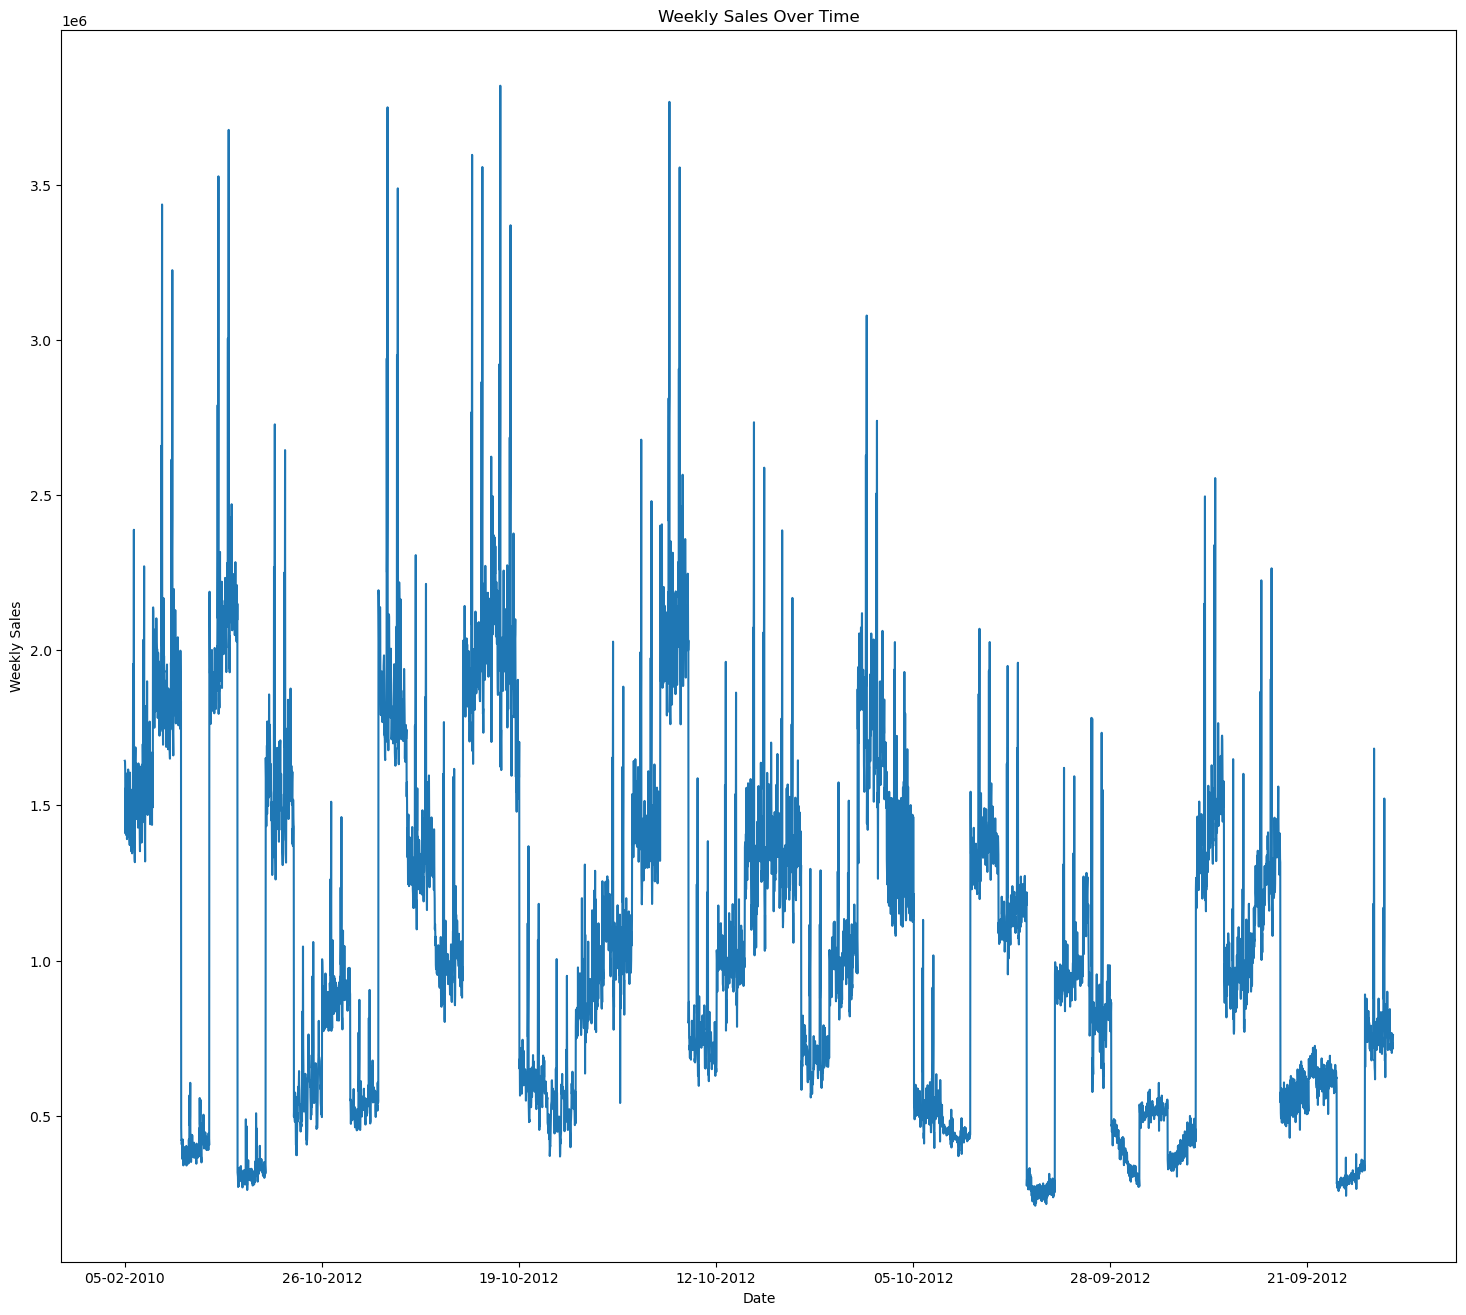

In [9]:
plt.figure(figsize=(18,16))
df['Weekly_Sales'].plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

c. Does temperature affect the weekly sales in any manner?

-0.06381001317946958


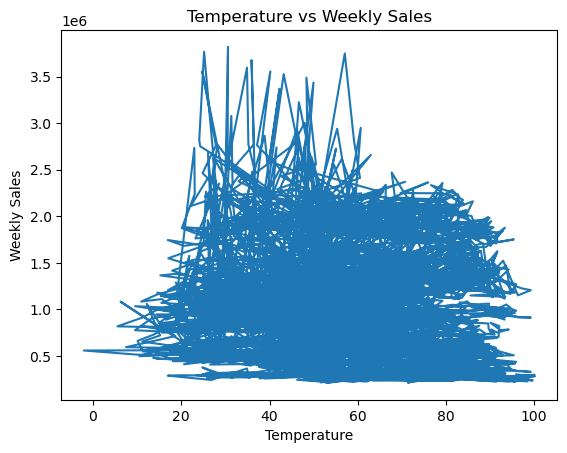

In [10]:

correlation = df['Temperature'].corr(df['Weekly_Sales'])
print(correlation)

plt.plot(df['Temperature'], df['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs Weekly Sales')
plt.show()

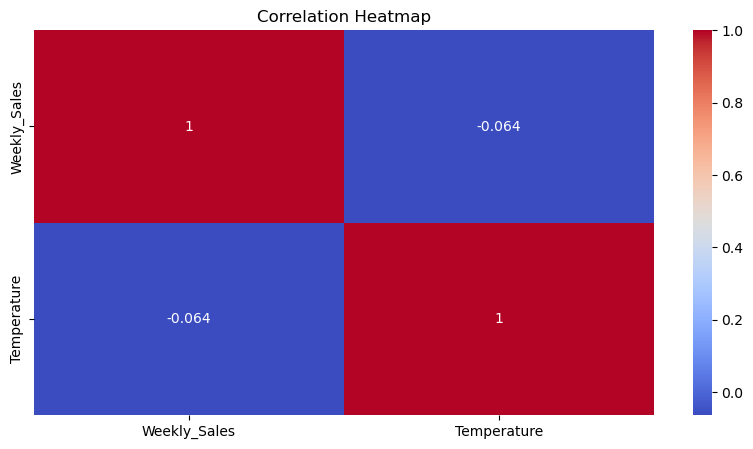

In [11]:
import seaborn as sns

#Visualize correlation between all features using a heat map
corr_matrix = df[["Weekly_Sales", "Temperature"]].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
#c  A positive correlation suggests that higher temperatures are associated with higher weekly sales, while a negative correlation suggests the opposite. 
#In this case Temparature rise means lower sales and vice versa

#d How is the Consumer Price index affecting the weekly sales of various stores?

The correlation between CPI and weekly sales for store 1 is 0.22540765942904442
The correlation between CPI and weekly sales for store 2 is -0.06243107067007712
The correlation between CPI and weekly sales for store 3 is 0.3172496339985819
The correlation between CPI and weekly sales for store 4 is 0.35115723812788235
The correlation between CPI and weekly sales for store 5 is 0.3082612991681616
The correlation between CPI and weekly sales for store 6 is -0.011357484639536605
The correlation between CPI and weekly sales for store 7 is 0.28904437749320994
The correlation between CPI and weekly sales for store 8 is 0.12025523036099092
The correlation between CPI and weekly sales for store 9 is 0.2948054830029042
The correlation between CPI and weekly sales for store 10 is -0.11537417240215438
The correlation between CPI and weekly sales for store 11 is 0.06978058146346156
The correlation between CPI and weekly sales for store 12 is 0.0840866724257406
The correlation between CPI and weekl

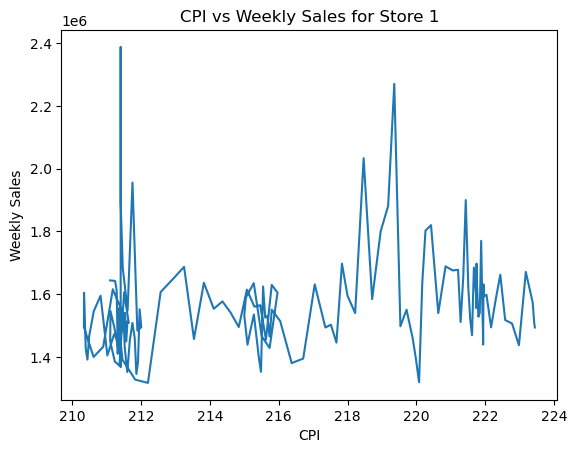

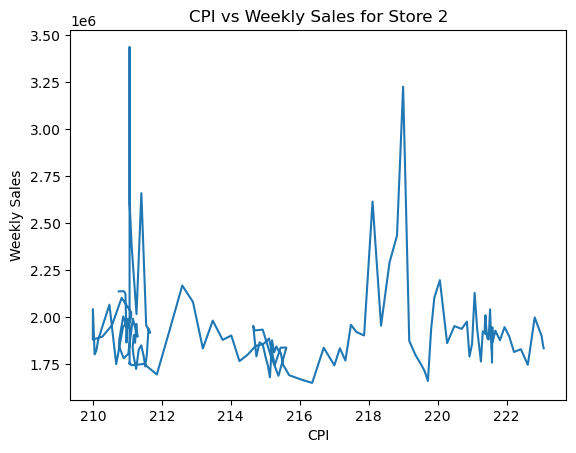

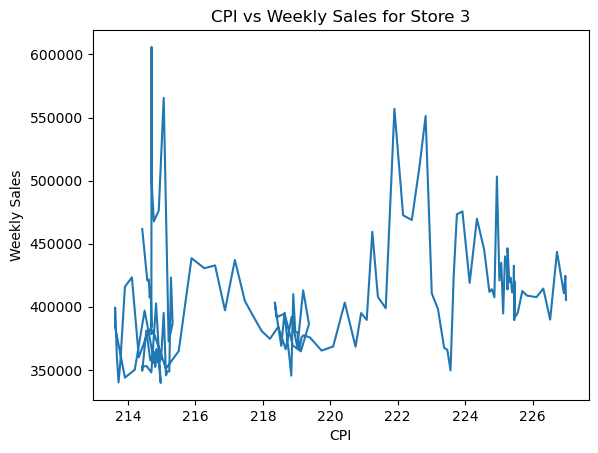

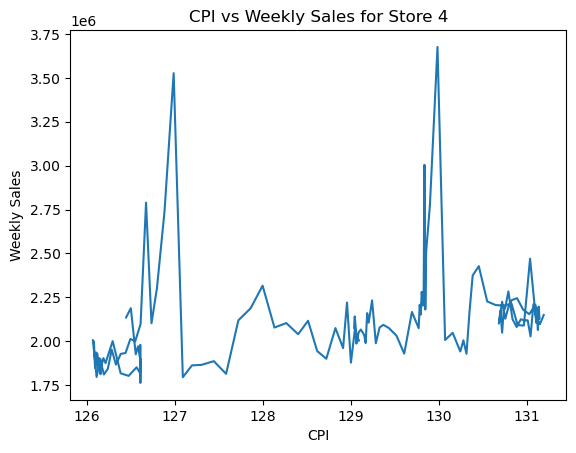

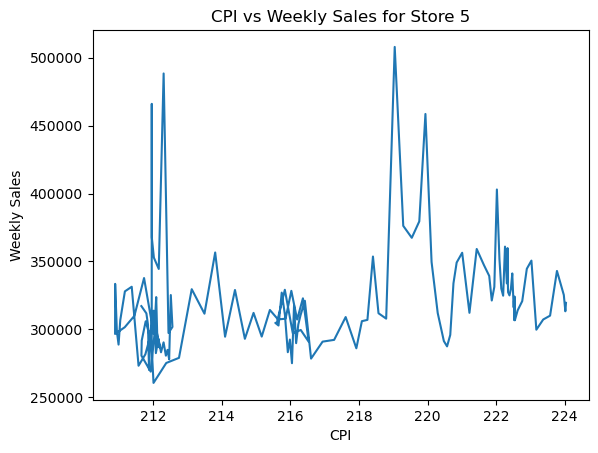

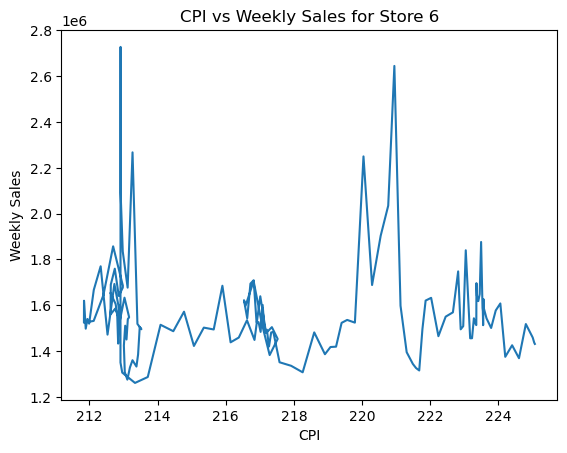

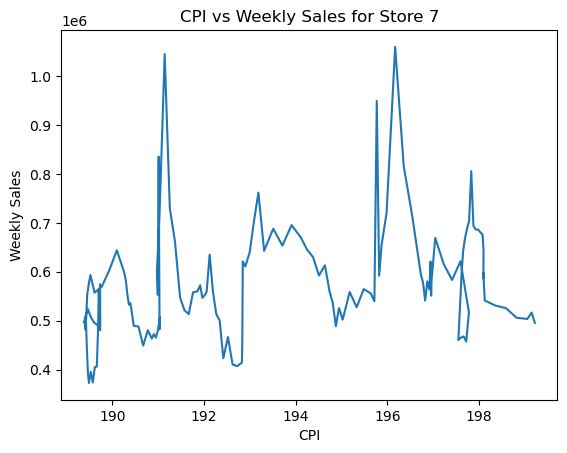

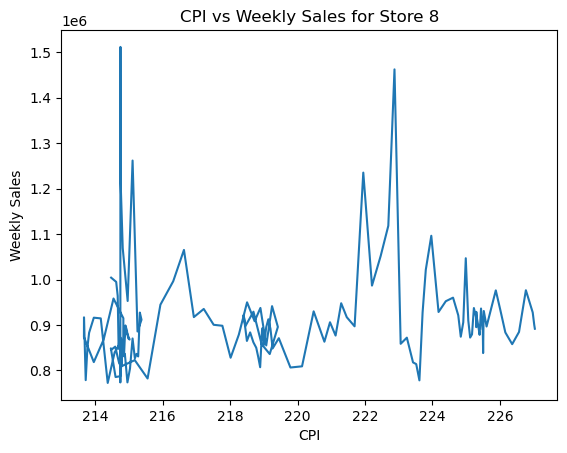

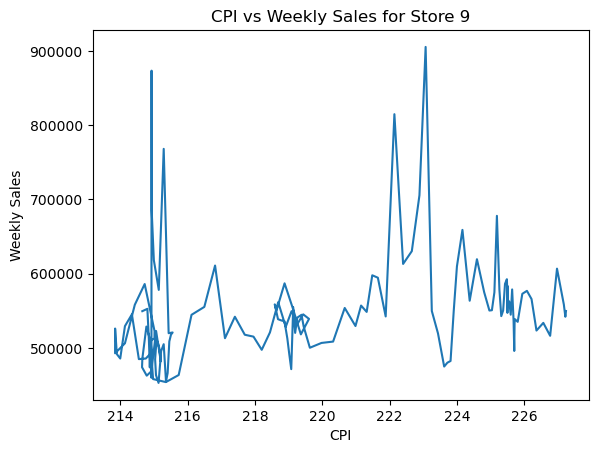

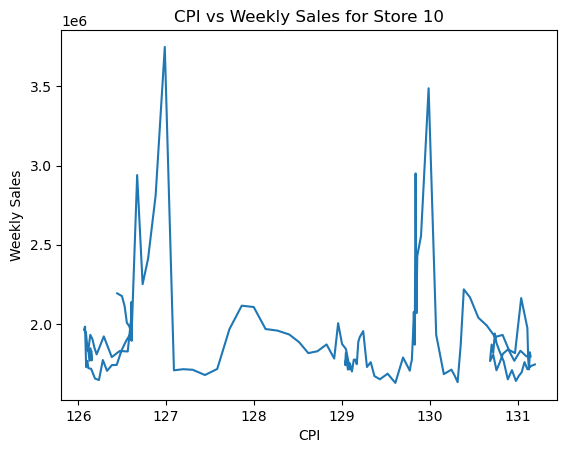

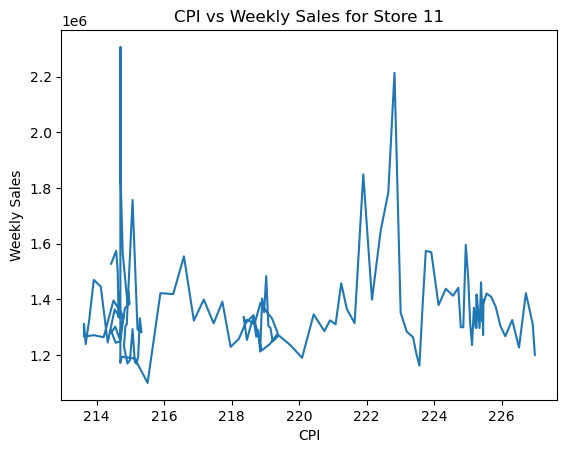

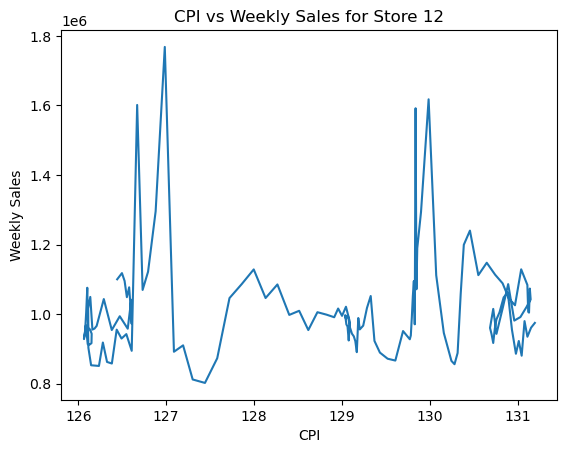

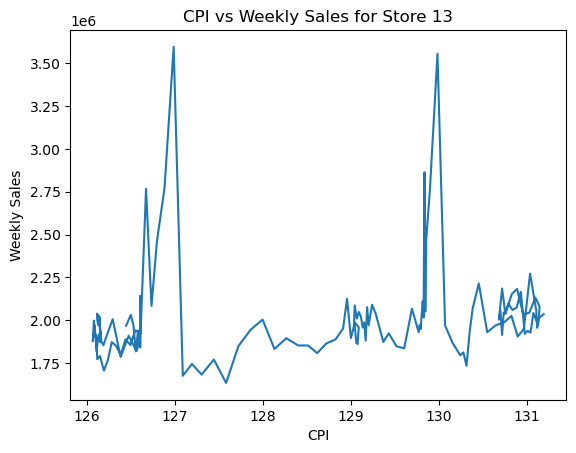

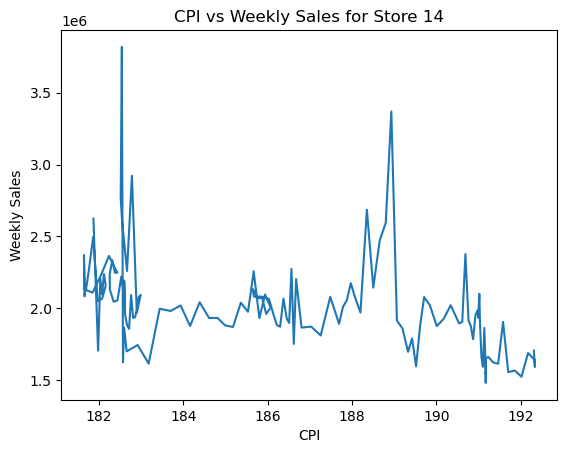

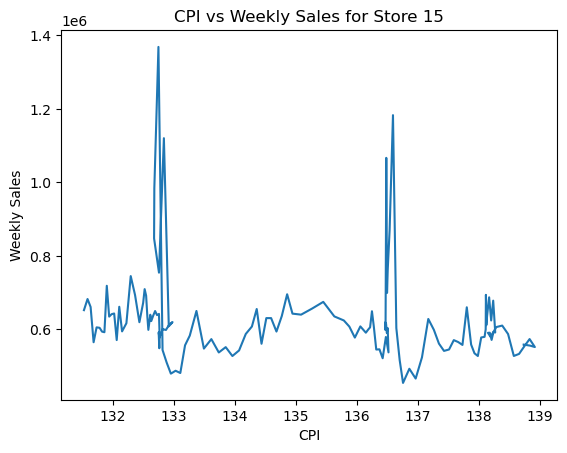

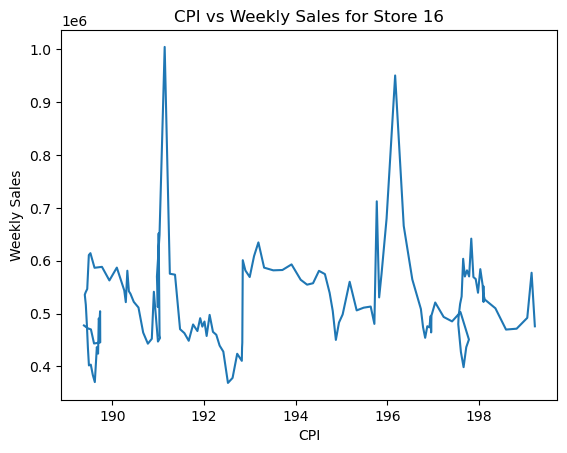

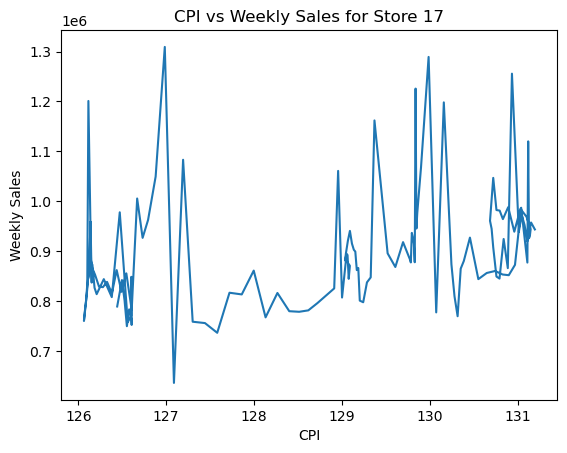

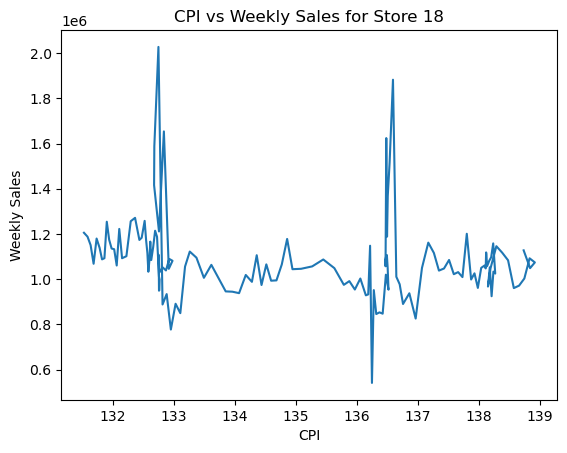

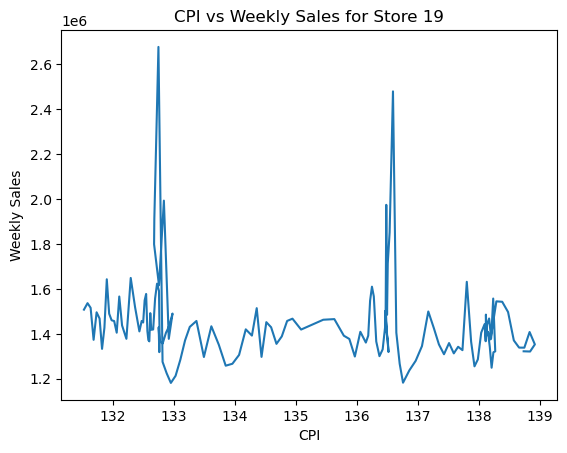

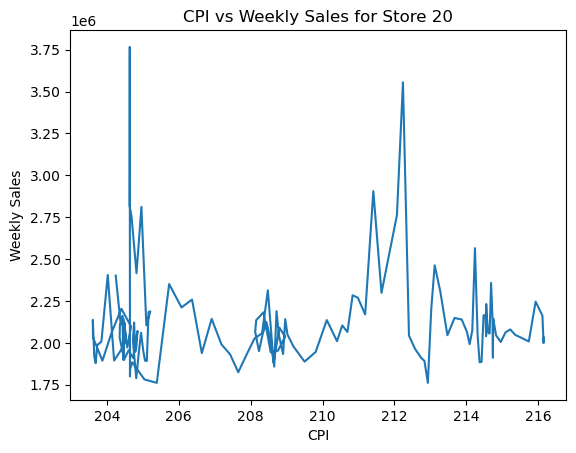

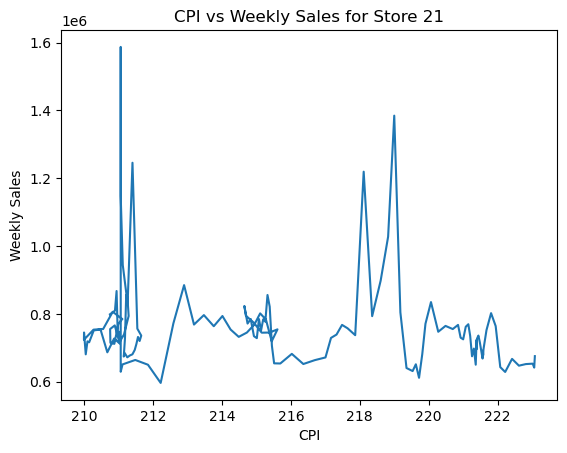

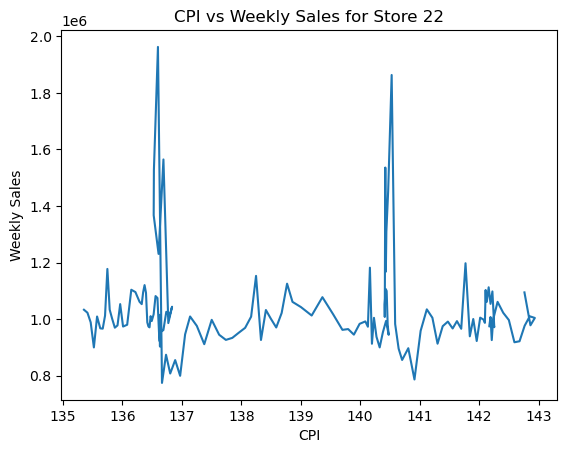

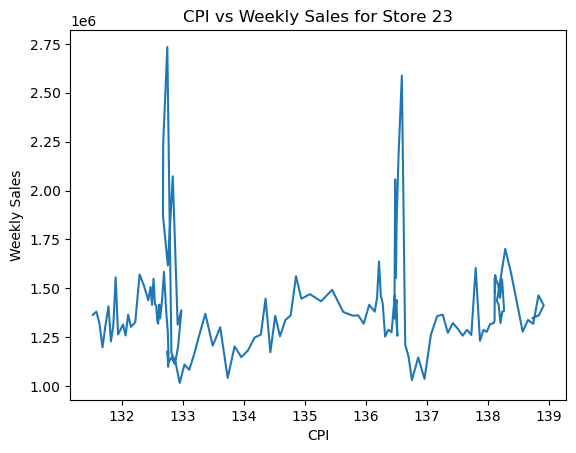

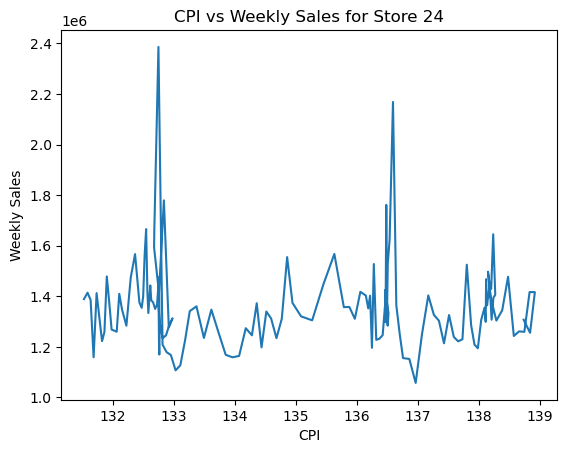

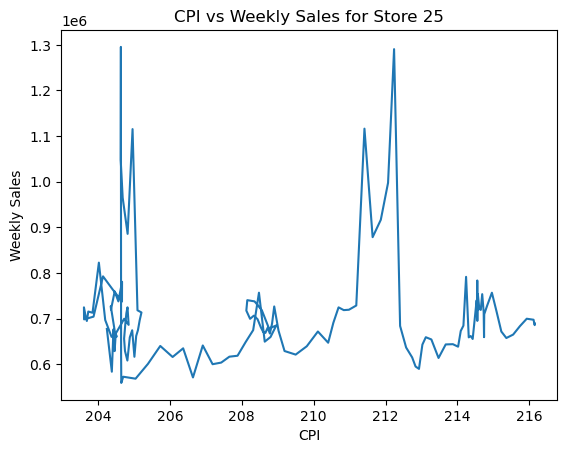

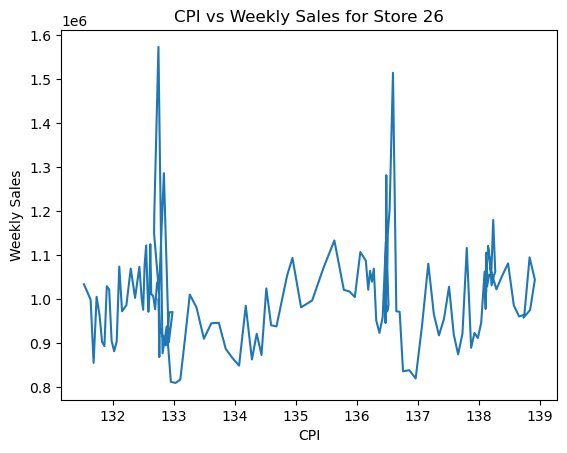

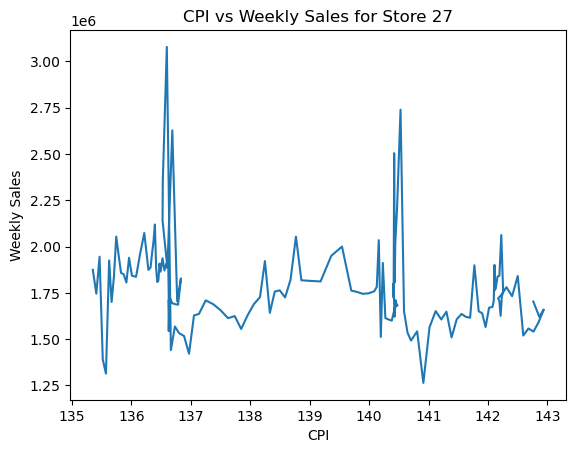

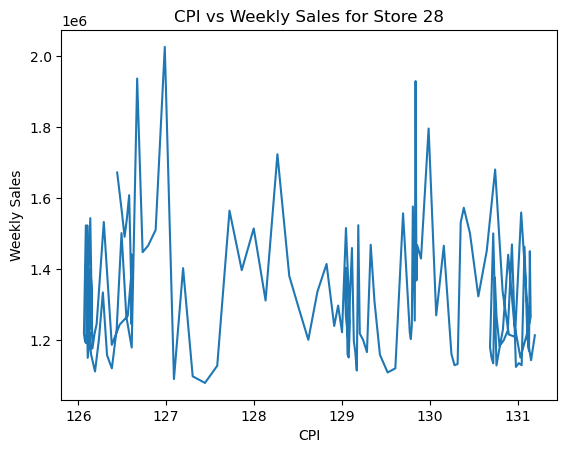

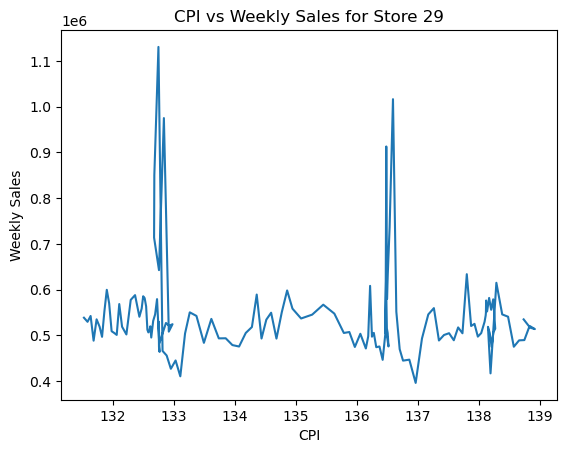

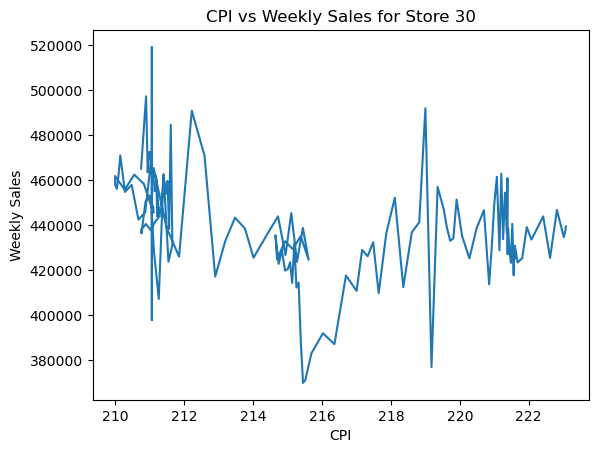

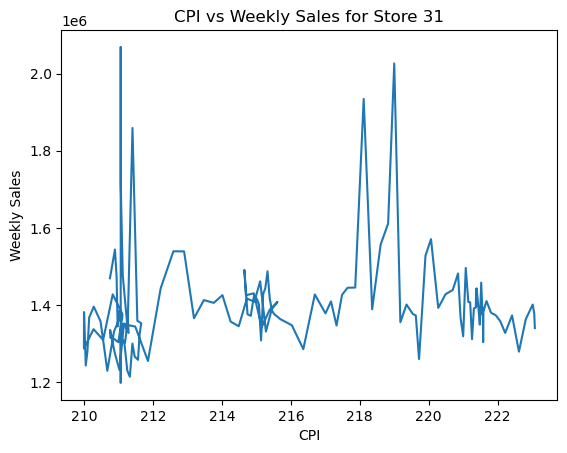

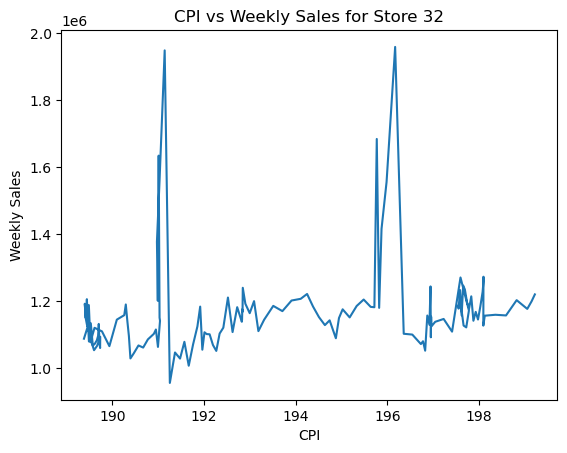

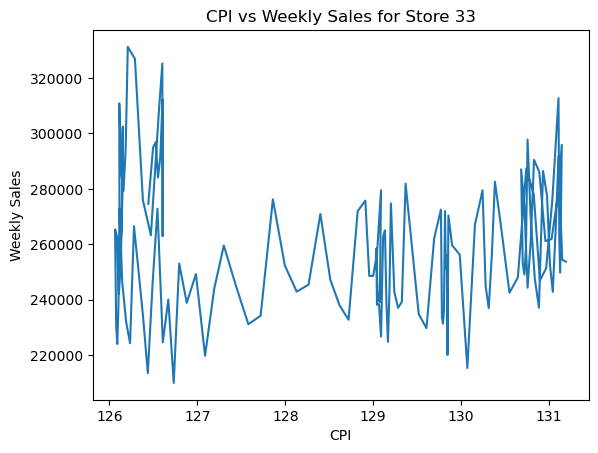

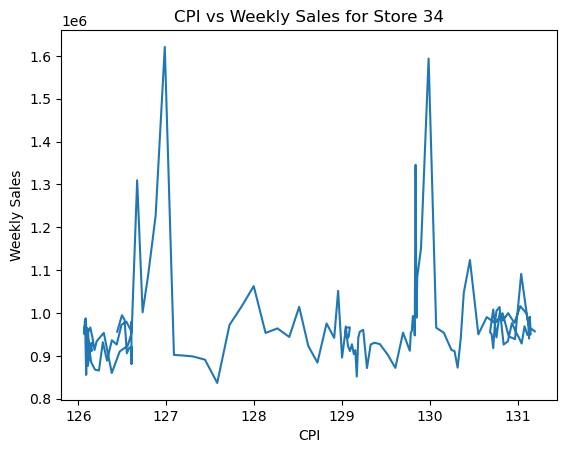

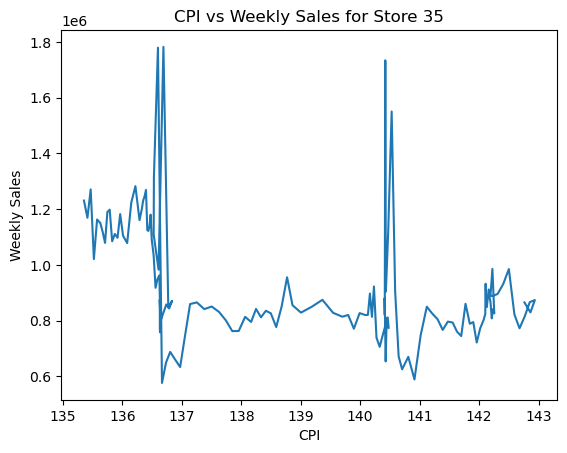

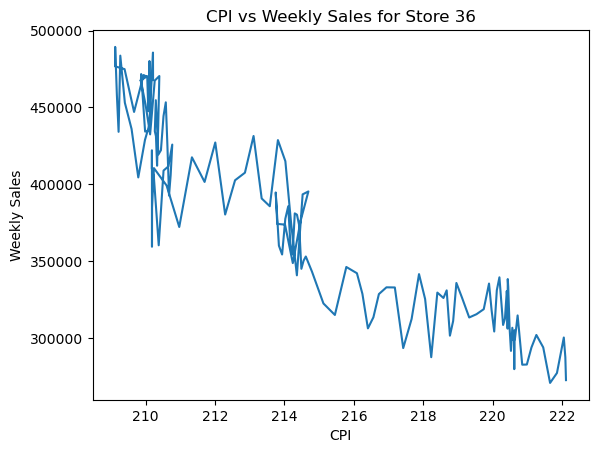

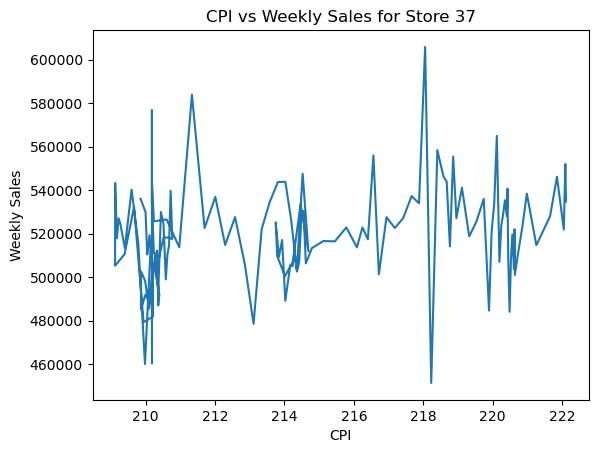

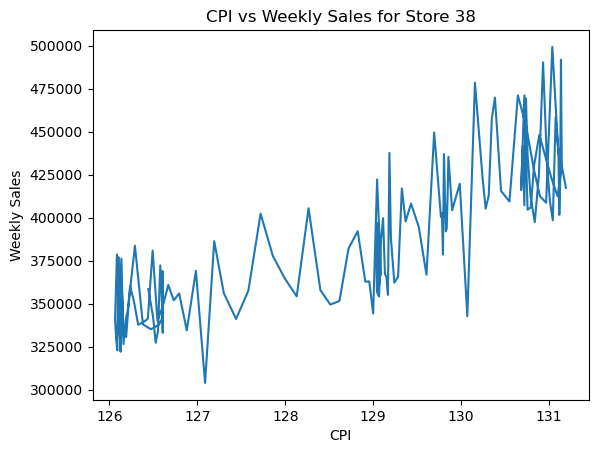

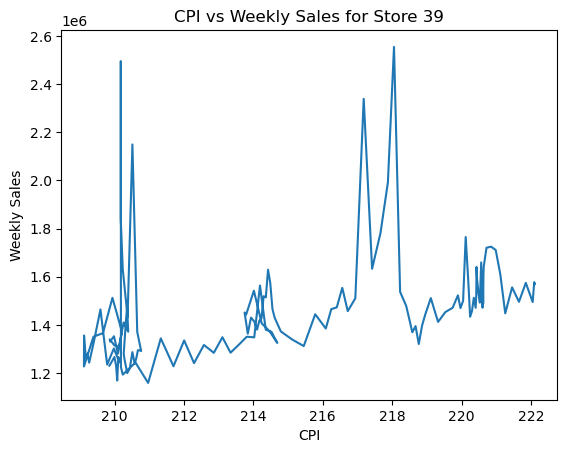

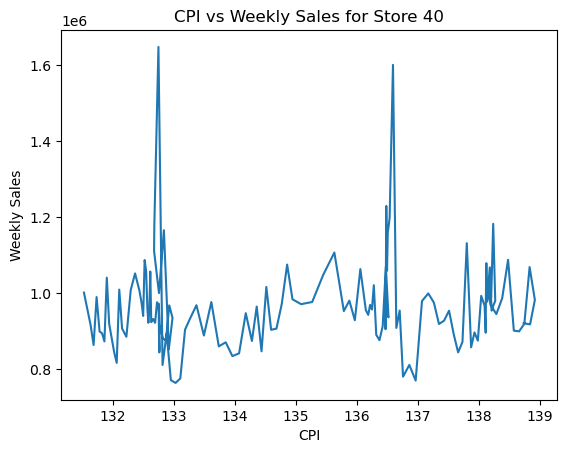

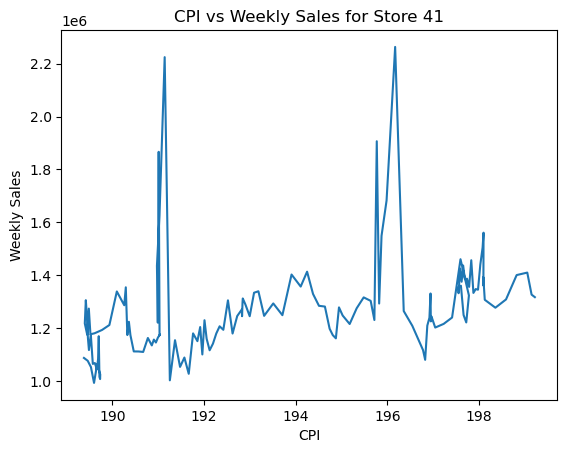

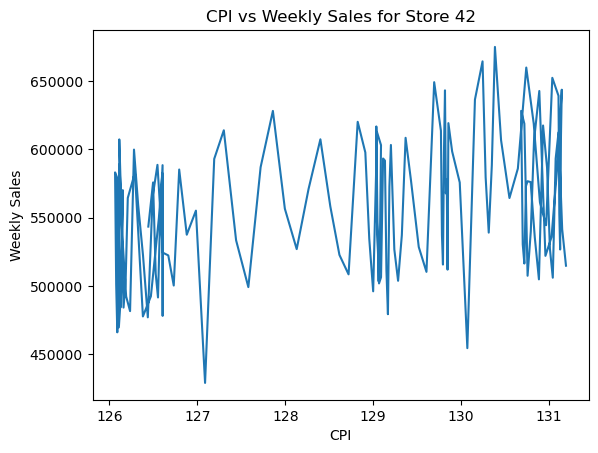

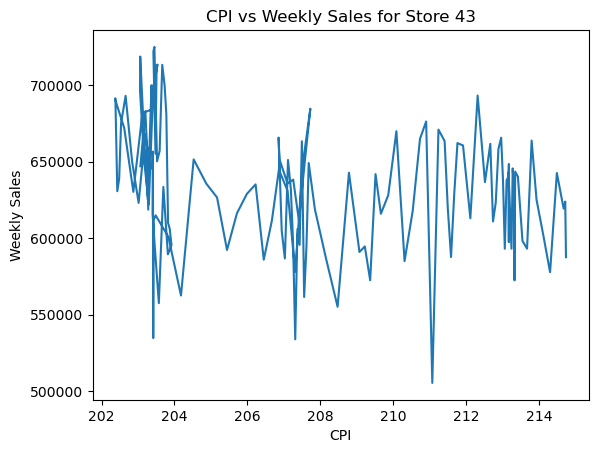

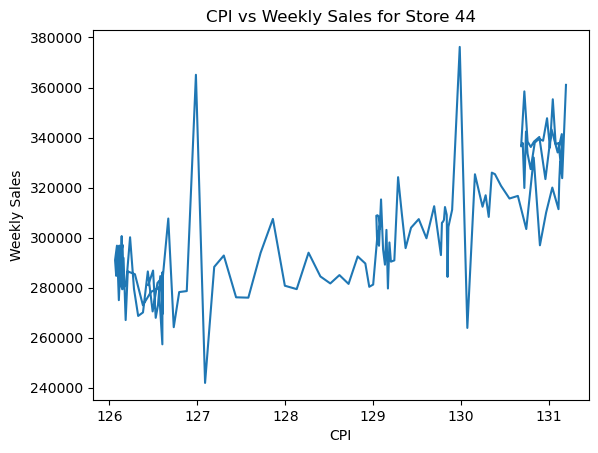

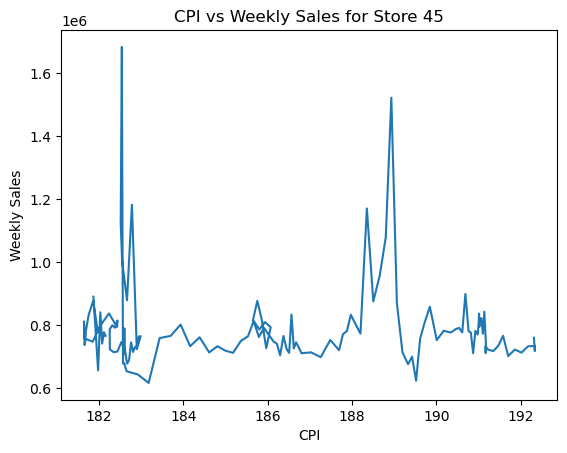

In [13]:
# Check the correlation between CPI and weekly sales for each store
for store in df['Store'].unique():
    correlation = df[df['Store'] == store]['CPI'].corr(df[df['Store'] == store]['Weekly_Sales'])
    print(f'The correlation between CPI and weekly sales for store {store} is {correlation}')

# Plot the CPI vs weekly sales for each store
for store in df['Store'].unique():
    plt.plot(df[df['Store'] == store]['CPI'], df[df['Store'] == store]['Weekly_Sales'])
    plt.xlabel('CPI')
    plt.ylabel('Weekly Sales')
    plt.title(f'CPI vs Weekly Sales for Store {store}')
    plt.show()


#e Top performing stores according to the historical data.

In [14]:
# Get the maximum weekly sales for each store
max_weekly_sales_per_store = df.groupby('Store')['Weekly_Sales'].max()

# Find the top 3 stores with the highest maximum weekly sales
top_3_stores = max_weekly_sales_per_store.nlargest(3)

# Print the top 3 stores
print(top_3_stores)

Store
14    3818686.45
20    3766687.43
10    3749057.69
Name: Weekly_Sales, dtype: float64


#f The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [15]:
# Get the maximum weekly sales for each store
max_weekly_sales_per_store = df.groupby('Store')['Weekly_Sales'].max()

# Get the minimum weekly sales for each store
min_weekly_sales_per_store = df.groupby('Store')['Weekly_Sales'].min()

# Find the store with the lowest minimum weekly sales
worst_performing_store = min_weekly_sales_per_store.idxmin()

# Get the difference between the highest and lowest weekly sales
difference_in_sales = max_weekly_sales_per_store - min_weekly_sales_per_store

# Print the worst performing store and the difference in sales
print(f'The worst performing store is {worst_performing_store} with minimum weekly sales of {min_weekly_sales_per_store[worst_performing_store]}.')
print(f'The difference between the highest and lowest weekly sales is {difference_in_sales.max()}.')

The worst performing store is 33 with minimum weekly sales of 209986.25.
The difference between the highest and lowest weekly sales is 2339171.79.


2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [16]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667


In [17]:
data1 = pd.read_csv(r'Walmart.csv')
data1.set_index('Date', inplace=True)
# There are about 45 different stores in this dataset. Lets select the any store id from 1-45
a= int(input("Enter the store id:"))
store = data1[data1.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id: 22


Weekly_Sales    float64
dtype: object

In [18]:
sales.head(20)

,Weekly_Sales
Date,
01-04-2011,951588.37
01-06-2012,1102857.37
01-07-2011,1077491.68
01-10-2010,905987.17
02-03-2012,974866.65
02-04-2010,1177340.99
02-07-2010,1120259.71
02-09-2011,912762.76
02-12-2011,1167621.14


In [19]:
#remove date from index to change its dtype because it clearly isnt acceptable.
sales.reset_index(inplace = True)
#converting 'date' column to a datetime type
sales['Date'] = pd.to_datetime(sales['Date'])
# resetting date back to the index
sales.set_index('Date',inplace = True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_14780\1042104552.py:4: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales['Date'] = pd.to_datetime(sales['Date'])
C:\Users\saksh\AppData\Local\Temp\ipykernel_14780\1042104552.py:4: UserWarning: Parsing '13-04-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales['Date'] = pd.to_datetime(sales['Date'])
C:\Users\saksh\AppData\Local\Temp\ipykernel_14780\1042104552.py:4: UserWarning: Parsing '13-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales['Date'] = pd.to_datetime(sales['Date'])
C:\Users\saksh\AppData\Local\Temp\ipykernel_14780\1042104552.py:4: UserWarning: Parsing '13-07-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales['Date'] = pd.to_datetime(sales['Date'])
C:\Users

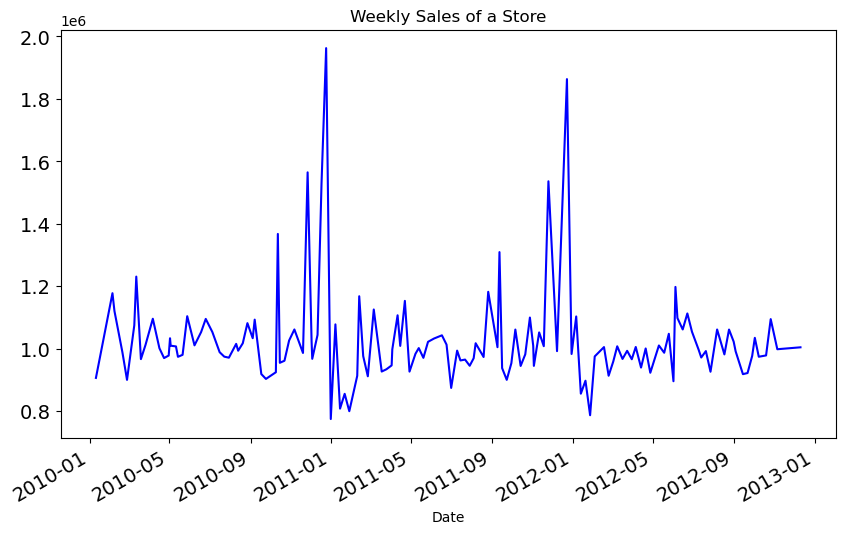

In [20]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

<Figure size 640x480 with 0 Axes>

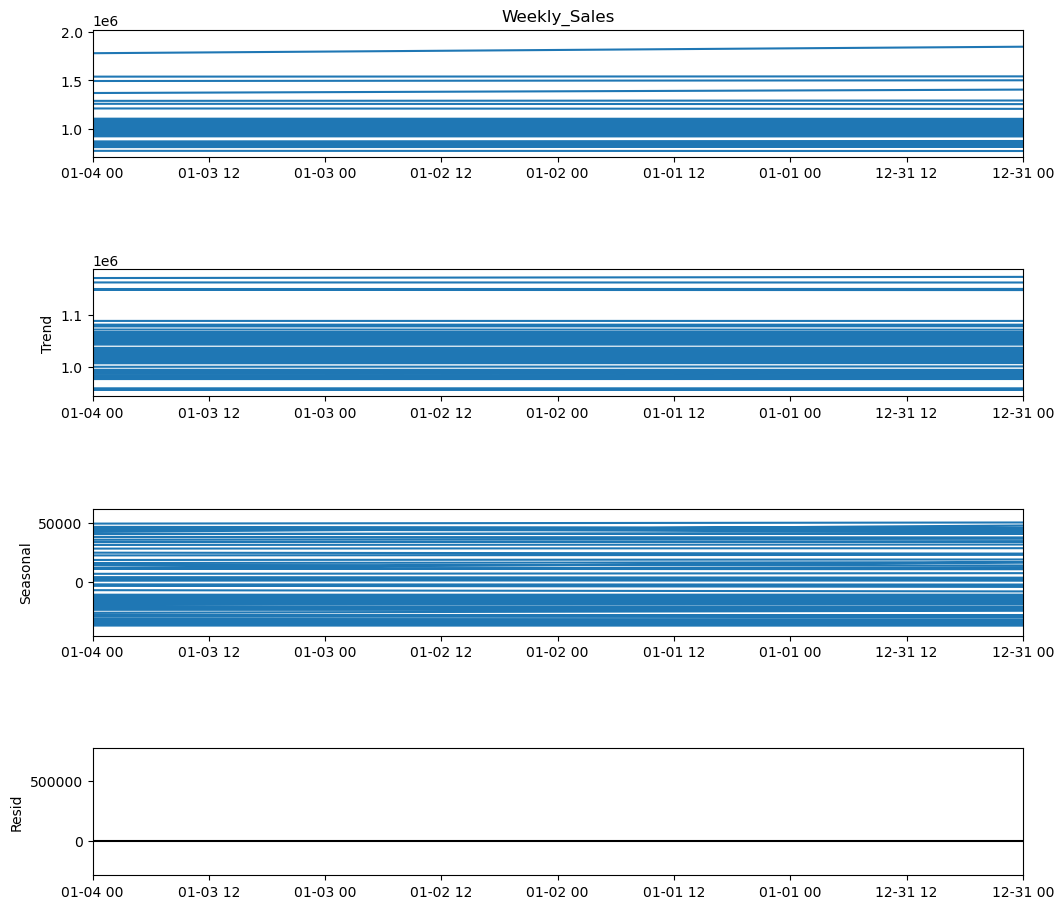

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [22]:
#lets compare the 2012 data of two stores
# Lets take store 5 data for analysis
store5 = data1[data1.Store == 5]
# there are about 45 different stores in this dataset.

sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
sales5.dtypes
# Grouped weekly sales by store 6

#remove date from index to change its dtype because it clearly isnt acceptable.
sales5.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales5['Date'] = pd.to_datetime(sales5['Date'])
# resetting date back to the index
sales5.set_index('Date',inplace = True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_14780\337423408.py:14: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales5['Date'] = pd.to_datetime(sales5['Date'])
C:\Users\saksh\AppData\Local\Temp\ipykernel_14780\337423408.py:14: UserWarning: Parsing '13-04-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales5['Date'] = pd.to_datetime(sales5['Date'])
C:\Users\saksh\AppData\Local\Temp\ipykernel_14780\337423408.py:14: UserWarning: Parsing '13-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales5['Date'] = pd.to_datetime(sales5['Date'])
C:\Users\saksh\AppData\Local\Temp\ipykernel_14780\337423408.py:14: UserWarning: Parsing '13-07-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales5['Date'] = pd.to_datetime(sales5['Date'])


In [23]:
y1=sales.Weekly_Sales
y2=sales5.Weekly_Sales

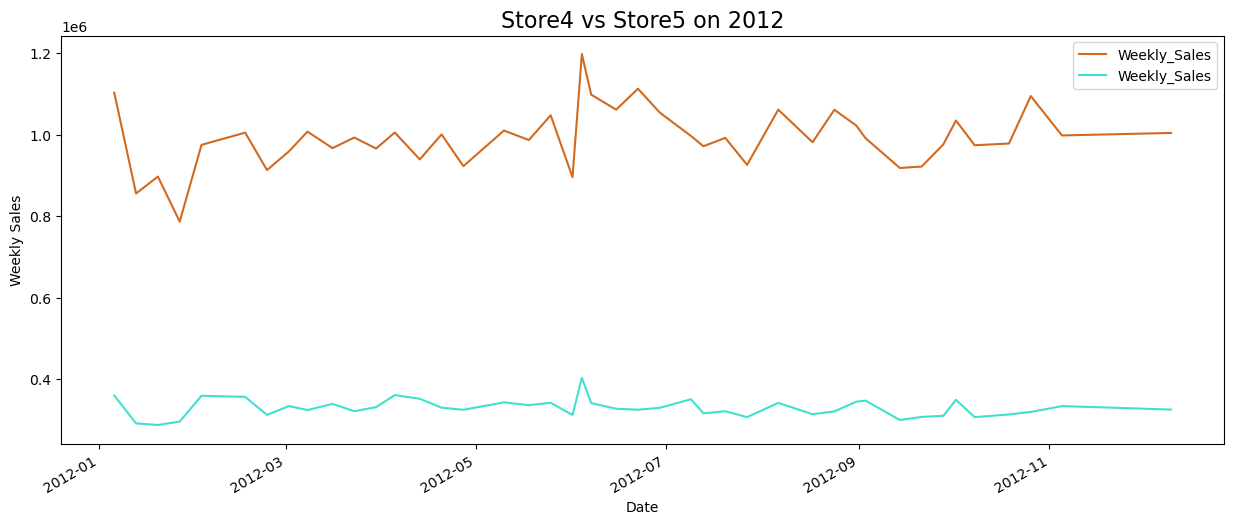

In [24]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store5 on 2012', fontsize = '16')
plt.show()

In [25]:
# Clearly we can see the irregularities 

In [26]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [27]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1910      0.258     -4.620      0.000      -1.696      -0.686
ar.L2         -1.1884      0.398     -2.988      0.003      -1.968      -0.409
ar.L3         -1.0852      0.305     -3.558      0.000      -1.683      -0.487
ar.L4         -0.8231      0.187     -4.408      0.000      -1.189      -0.457
ma.L1         -2.2545      0.266     -8.483      0.000      -2.775      -1.734
ma.L2          1.5196      0.508      2.990      0.003       0.523       2.516
ma.L3         -0.2623      0.267     -0.982      0.326      -0.786       0.261
ar.S.L52      -0.7291      0.193     -3.770      0.000      -1.108      -0.350
sigma2      1.142e+11   1.53e-12   7.47e+22      0.000    1.14e+11    1.14e+11


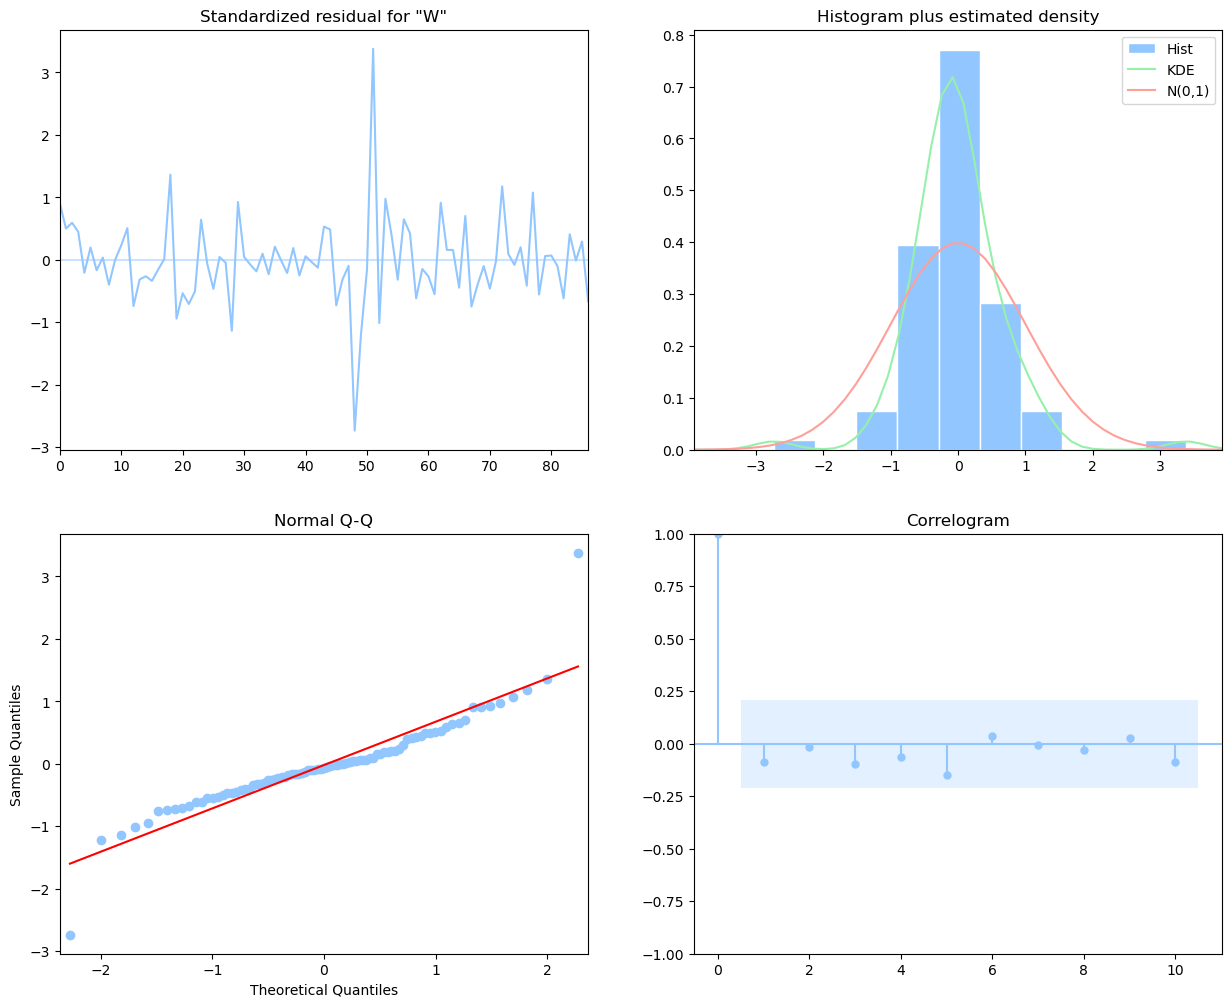

In [28]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

C:\Users\saksh\AppData\Local\Temp\ipykernel_14780\2689329424.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed')


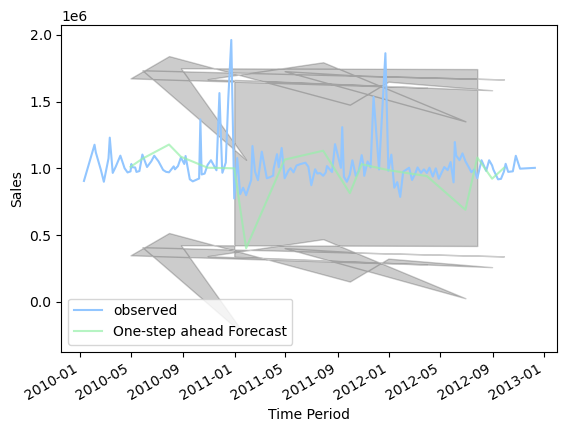

In [30]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [32]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 11625125883.19


In [33]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

C:\Users\saksh\AppData\Local\Temp\ipykernel_14780\4127785946.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed', figsize=(12, 8))


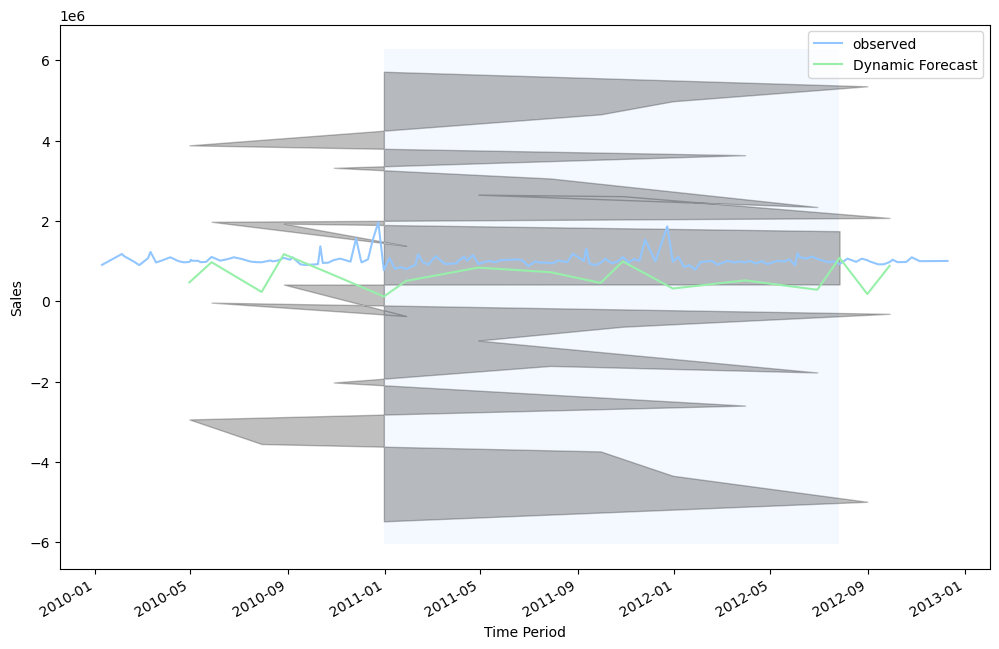

In [34]:


ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()



In [35]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    1.081362e+06
2010-08-27    1.173992e+06
2011-01-28    5.069181e+05
2010-05-28    9.722958e+05
2012-09-28    8.808282e+05
2011-10-28    9.912766e+05
2011-04-29    8.377774e+05
2012-06-29    2.865013e+05
2011-07-29    7.236465e+05
2010-10-29    6.499046e+05
2012-03-30    5.195738e+05
2010-04-30    4.696515e+05
2010-07-30    2.316991e+05
2011-09-30    4.573898e+05
2011-12-30    3.171737e+05
2012-08-31    1.795773e+05
2010-12-31    1.175410e+05
Name: predicted_mean, dtype: float64


In [36]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-08-06    1061134.37
2012-09-03     991127.01
2012-10-02    1034448.07
2012-10-08     973812.79
2012-11-05     997868.63
2012-12-10    1004039.84
2012-09-14     918049.28
2012-08-17     981273.26
2012-10-19     978027.95
2012-09-21     921612.53
2012-08-24    1060906.75
2012-10-26    1094422.69
2012-07-27     925731.21
2012-09-28     976479.51
2012-08-31    1022270.86
Name: Weekly_Sales, dtype: float64


In [37]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 497829.54


In [38]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 1093976.148484007


In [39]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [40]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

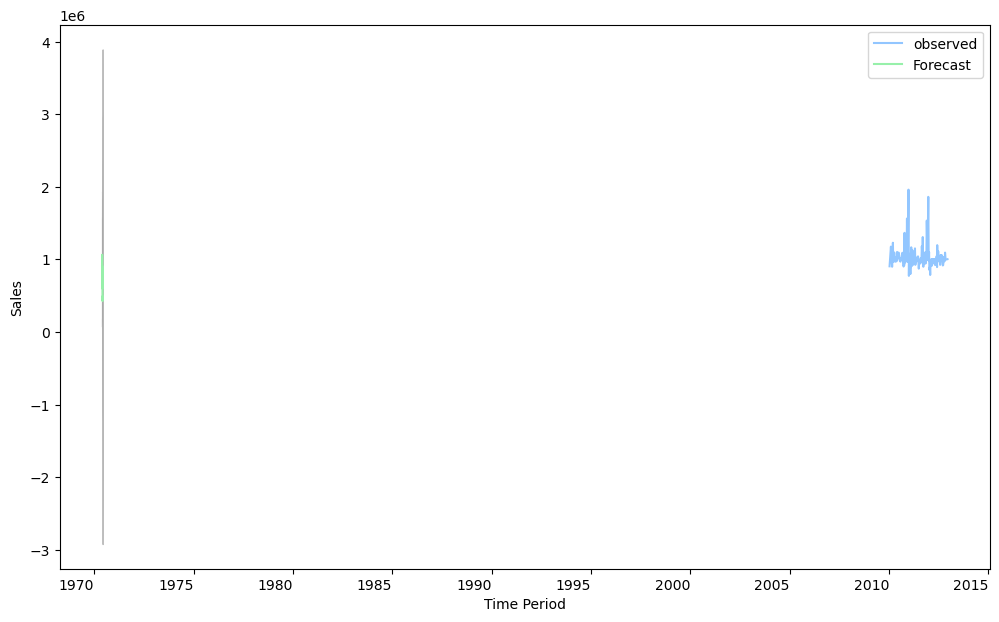

In [41]:


ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

